In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
import plotly.express as px
from scipy.stats import ttest_ind
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = pd.read_csv("DataSet2.csv")

In [ ]:
data.shape

(571, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

In [ ]:
data.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [ ]:
data.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                          133
Genres                              132
Critic Consensus                    232
Content Rating                      132
Directors                           134
Authors                             134
Actors                              132
Original Release Date               132
Streaming Release Date              133
Production Company                  132
Tomatometer Status                  132
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                     135
Audience Rating                     132


In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Film - 0%
Oscar Year - 0%
Film Studio/Producer(s) - 0%
Award - 0%
Year of Release - 0%
Movie Time - 0%
Movie Genre - 0%
IMDB Rating - 0%
IMDB Votes - 0%
Movie Info - 23%
Genres - 23%
Critic Consensus - 41%
Content Rating - 23%
Directors - 23%
Authors - 23%
Actors - 23%
Original Release Date - 23%
Streaming Release Date - 23%
Production Company - 23%
Tomatometer Status - 23%
Tomatometer Rating - 23%
Tomatometer Count - 23%
Audience Status - 24%
Audience Rating - 23%
Audience Count - 23%
Tomatometer Top Critics Count - 23%
Tomatometer Fresh Critics Count - 23%
Tomatometer Rotten Critics Count - 23%
Film ID - 0%


In [ ]:
data.Award.unique()

array(['Winner', 'Nominee'], dtype=object)

## План работы


1.   Проверить на дубликаты.
2. Oscar Year - год (есть проблема 1927/30) - нужно убрать, где есть /30 и подобное. Пропущенные значения заменить на Unknown .
2.   Movie Genre - нужно сделать список, просплитив запятыми. Пропущенные значения заменить на Unknown.
3. Authors, Actors такая же история как и предыдущая.
4. Original Release Date, Streaming Release Date перевести в дату и заполнить значения (под вопросом).
5. Production Company - заменить значения на Unknown.
6. Tomatometer Status - заменить на моду.
7. Tomatometer Rating - заменить на медиану.
8. Tomatometer Count - заменить на медиану.
9. Audience Status - заменить на Unknown.
10. Audience Rating - заменить на медиану.
11. Audience Count - заменить на медиану.
12. Tomatometer Top Critics Count - заменить на медиану.
13. Tomatometer Fresh Critics Count - заменить на медиану.
14. Tomatometer Rotten Critics Count - заменить на медиану.
14. Critic Consensus - заменить на Unknown.
15. IMDB Votes - перевести в int
15. Дропнуть колонки id и Unnamed.





In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,571.0,285.000000,1.649778e+02,0.0,142.5,285.0,427.5,570.0
Year of Release,571.0,1973.357268,2.931574e+01,1927.0,1944.0,1972.0,2001.0,2021.0
Movie Time,571.0,124.894921,2.632282e+01,66.0,107.0,121.0,136.5,238.0
IMDB Rating,571.0,7.570403,5.596518e-01,5.6,7.3,7.6,7.9,9.3
Tomatometer Rating,439.0,87.503417,1.169062e+01,29.0,84.0,91.0,95.0,100.0
Tomatometer Count,439.0,110.697039,1.195414e+02,5.0,25.0,54.0,199.0,574.0
Audience Rating,439.0,82.428246,1.092790e+01,21.0,78.0,85.0,90.0,98.0
Audience Count,439.0,515414.455581,3.623107e+06,6.0,6637.5,37166.0,125536.5,35797635.0
Tomatometer Top Critics Count,439.0,21.861048,2.161549e+01,0.0,5.0,11.0,45.0,69.0
Tomatometer Fresh Critics Count,439.0,98.471526,1.077986e+02,3.0,21.5,49.0,163.5,495.0


In [ ]:
data.duplicated().sum()

0

# Замена пропущенных значений

In [ ]:
class FeatureDrop(BaseEstimator):

  def fit(self, X, y=None):
      return self

  def transform(self, X):
      X.drop(['Unnamed: 0', 'Film ID'], axis=1, inplace=True)
      X.dropna(subset=['Original Release Date', 'Streaming Release Date'], inplace=True)
      return X

In [ ]:
class FillingMissingValues(BaseEstimator):

  def fit(self, X, y=None):
      return self

  def transform(self, X):
      filling_columns_with_median_value = [
          "Tomatometer Rating",
          "Tomatometer Count",
          "Audience Rating",
          "Audience Count",
          "Tomatometer Top Critics Count",
          "Tomatometer Fresh Critics Count",
          "Tomatometer Rotten Critics Count"]

      filling_columns_with_the_word_unknown = [
          "Production Company",
          "Audience Status",
          "Critic Consensus",
          "Actors",
          "Authors",
          "Directors"]

      for col in filling_columns_with_median_value:
        X[col] = X[col].fillna(X[col].median())

      for col in filling_columns_with_the_word_unknown:
        X[col] = X[col].fillna('Unknown')

      X['Tomatometer Status'] = X['Tomatometer Status'].fillna(X['Tomatometer Status'].mode())

      return X

In [ ]:
class Preprocessing(BaseEstimator):

   def fit(self, X, y=None):
       return self

   def transform(self, X):
       X['Oscar Year'] = X['Oscar Year'].apply(lambda x: int(x) if len(x) == 4 else  int(x[:-3]))
       X['Movie Genre'] = X['Movie Genre'].apply(lambda x: x.split(','))
       X['Authors'] = X['Authors'].apply(lambda x: x.split(',') if isinstance(x, str) else np.nan)
       X['Actors'] = X['Actors'].apply(lambda x: x.split(',') if isinstance(x, str) else np.nan)
       X['IMDB Votes'] = X['IMDB Votes'].apply(lambda x: x.replace(",", '') if ',' in x else x).astype(int)
       X['Original Release Date'] = pd.to_datetime(X['Original Release Date'])
       X['Streaming Release Date'] = pd.to_datetime(X['Streaming Release Date'])
       return X

In [ ]:
pipeline = Pipeline([('preprocessing', Preprocessing()),
                     ('featuredrop', FeatureDrop()),
                     ('fillingmissingvalues', FillingMissingValues())])

In [ ]:
movie_data = pipeline.fit_transform(data)

In [ ]:
movie_data.head()

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,Wings,1927,Famous Players-Lasky,Winner,1927,144,"[Drama, Romance, War]",7.5,12221,"With World War I afoot, David Armstrong (Richa...",...,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0
3,The Broadway Melody,1928,Metro-Goldwyn-Mayer,Winner,1929,100,"[Drama, Musical, Romance]",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0
6,In Old Arizona,1928,Fox,Nominee,1928,95,[Western],5.6,1019,"In this early Western, notorious bandit the Ci...",...,20th Century Fox Film Corporation,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0
9,The Big House,1929,Cosmopolitan,Nominee,1930,87,"[Crime, Drama, Thriller]",7.1,2079,"After being convicted of manslaughter, drunk d...",...,Warner Bros.,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0
13,Cimarron,1930,RKO Radio,Winner,1931,123,"[Drama, Western]",5.9,5851,"In 1889, adventurous lawyer and newspaper edit...",...,MGM Home Entertainment,Rotten,50.0,24.0,Spilled,25.0,1514.0,6.0,12.0,12.0


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 561
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Film                              438 non-null    object        
 1   Oscar Year                        438 non-null    int64         
 2   Film Studio/Producer(s)           438 non-null    object        
 3   Award                             438 non-null    object        
 4   Year of Release                   438 non-null    int64         
 5   Movie Time                        438 non-null    int64         
 6   Movie Genre                       438 non-null    object        
 7   IMDB Rating                       438 non-null    float64       
 8   IMDB Votes                        438 non-null    int64         
 9   Movie Info                        438 non-null    object        
 10  Genres                            438 non-null    

In [ ]:
movie_data.to_csv("movie_data.csv")

# EDA
Первым этапом анализа будет проведение корреляционного анализа количественных переменных. Этот шаг является важным, поскольку он может оказать значительное влияние на наши будущие предсказания в отношении целевой переменной.

### Величина и сила коэффициента корреляции

Значение | Интерпритация
--- | :---:
от 0,3 до 0,5 | слабая
от 0,5 до 0,7 | средняя
от 0,7 до 0,9 | высокая
от 0,9 до 1 | очень высокая

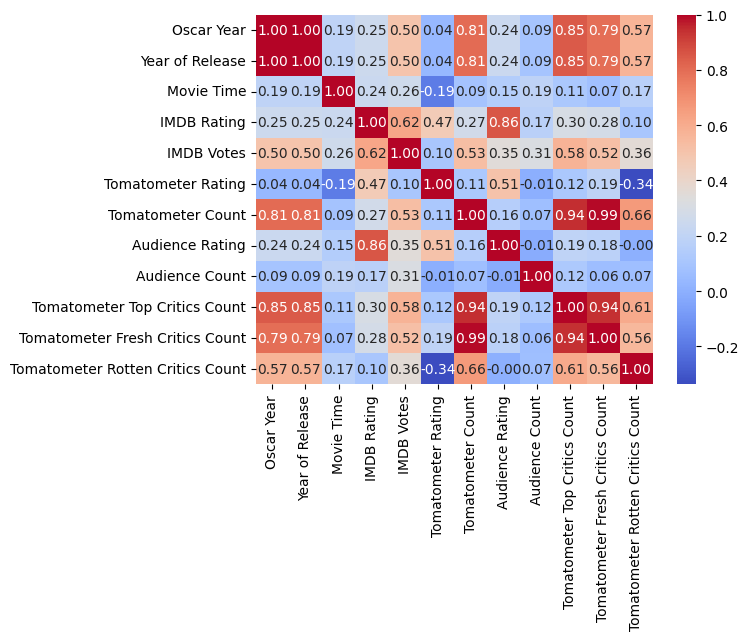

In [ ]:
df_corr = movie_data.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f");

Вполне вероятно, что мы имеем дело с мультиколлинеарностью, учитывая наличие значительной корреляции между многими признаками.

### IMDb Rating: Максимальное и минимальное значение в году, когда были вручены или номинированы Оскары

In [ ]:
maximum_imdb_rating = movie_data.groupby('Oscar Year')['IMDB Rating'].max().reset_index()
fig = px.line(maximum_imdb_rating, x="Oscar Year", y="IMDB Rating")
plt.figure(figsize=(10, 6))

fig.update_layout(
    title="Максимальный рейтинг IMDb по годам Оскара",
    xaxis_title="Год Оскара",
    yaxis_title="Максимальный рейтинг IMDb"
)
fig.show();

<Figure size 1000x600 with 0 Axes>

In [ ]:
maximum_imdb_rating = movie_data.groupby('Oscar Year')['IMDB Rating'].min().reset_index()
fig = px.line(maximum_imdb_rating, x="Oscar Year", y="IMDB Rating")
plt.figure(figsize=(10, 6))

fig.update_layout(
    title="Минимальный рейтинг IMDb по годам Оскара",
    xaxis_title="Год Оскара",
    yaxis_title="Минимальный рейтинг IMDb"
)
fig.show();

<Figure size 1000x600 with 0 Axes>

#R

Для проведения различных статистических тестов удобно воспользоваться языком программирования R, который предоставляет обширные возможности и богатый набор пакетов для анализа данных. После завершения статистических тестов в R полученные результаты могут быть без труда интегрированы в последующий анализ данных с использованием Python.

In [ ]:
# df <- read.csv("movie_data.csv")
# row.names(df) <- df$X
# df$X <- NULL
# str(df)

'data.frame':	438 obs. of  28 variables:
 $ Film                            : chr  "Wings" "The Broadway Melody" "In Old Arizona" "The Big House" ...
 $ Oscar.Year                      : int  1927 1928 1928 1929 1930 1931 1931 1932 1932 1932 ...
 $ Film.Studio.Producer.s.         : chr  "Famous Players-Lasky" "Metro-Goldwyn-Mayer" "Fox" "Cosmopolitan" ...
 $ Award                           : chr  "Winner" "Winner" "Nominee" "Nominee" ...
 $ Year.of.Release                 : int  1927 1929 1928 1930 1931 1932 1931 1933 1933 1932 ...
 $ Movie.Time                      : int  144 100 95 87 123 112 86 112 89 80 ...
 $ Movie.Genre                     : chr  "['Drama', 'Romance', 'War']" "['Drama', 'Musical', 'Romance']" "['Western']" "['Crime', 'Drama', 'Thriller']" ...
 $ IMDB.Rating                     : num  7.5 5.7 5.6 7.1 5.9 7.4 7.3 5.9 7.4 6.5 ...
 $ IMDB.Votes                      : chr  "12,221" "6,890" "1,019" "2,079" ...
 $ Movie.Info                      : chr  "With World War I

Проверим наши фичи на нормальность распределения с помощью теста Шапиро-Уилка


In [ ]:
# movie_num <- df[, sapply(df, is.numeric)]
# for (col_name in names(movie_num)) {
#   print('_______________________________________________________________________|')
#   shapiro_test_result <- shapiro.test(movie_num[[col_name]])
#   print(paste("Колонка:", col_name))
#   print(paste("p-value:", shapiro_test_result$p.value))
#   if (shapiro_test_result$p.value < 0.05) {
#     print("Отклоняем нулевую гипотезу: данные не имеют нормальное распределение.")
#   } else {
#     print("Не отклоняем нулевую гипотезу: данные имеют нормальное распределение.")
#   }
# }

[1] "_______________________________________________________________________|"
[1] "Колонка: Oscar.Year"
[1] "p-value: 1.84481376355649e-13"
[1] "Отклоняем нулевую гипотезу: данные не имеют нормальное распределение."
[1] "_______________________________________________________________________|"
[1] "Колонка: Year.of.Release"
[1] "p-value: 1.491622580296e-13"
[1] "Отклоняем нулевую гипотезу: данные не имеют нормальное распределение."
[1] "_______________________________________________________________________|"
[1] "Колонка: Movie.Time"
[1] "p-value: 1.61916437947621e-11"
[1] "Отклоняем нулевую гипотезу: данные не имеют нормальное распределение."
[1] "_______________________________________________________________________|"
[1] "Колонка: IMDB.Rating"
[1] "p-value: 1.15306630632087e-05"
[1] "Отклоняем нулевую гипотезу: данные не имеют нормальное распределение."
[1] "_______________________________________________________________________|"
[1] "Колонка: Tomatometer.Rating"
[1] "p-value: 3

Результаты теста Шапиро-Уилка показывают, что ни одна из колонок не имеет нормального распределения, это означает, что  данные не соответствуют нормальному распределению по стандартным критериям.

In [ ]:
# award_win <- subset(df, Award == 'Winner')[, c(4, ncol(df)-3)]
# award_nominee <- subset(df, Award == 'Nominee')[, c(4, ncol(df)-3)]

In [ ]:
# result_anova <- aov(Audience.Count  ~ Award, data = df)
# summary(result_anova)

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
Award         1 2.984e+14 2.984e+14   23.87 1.45e-06 ***
Residuals   436 5.451e+15 1.250e+13                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

На основе результатов однофакторного дисперсионного анализа можно сделать следующие выводы:
1. Между группами 'Победители' и 'Номинанты' есть действительно важное различие в том, что мы исследуем. Это различие настолько убедительно, что шансы на то, что оно появилось случайно, практически нулевые.
2. Фактор 'Award' оказывает значительное воздействие на исследуемую переменную. Это указывает на то, что статус 'Winner' или 'Nominee' имеет важное значение для этой переменной и влияет на её значения.
3. Значение F-статистики (23.87) также показывает, что различия между группами действительно важны и не случайны

Вывод:  статус "Winner" или "Nominee" влияет на исследуемую переменную, и средние значения этой переменной различаются между этими двумя группами.

# Продолжение на Python

In [ ]:
movie_data['Production Company'].unique()

array(['Unknown', 'MGM Home Entertainment',
       '20th Century Fox Film Corporation', 'Warner Bros.', 'MGM',
       'Gravitas', 'WARNER BROTHERS PICTURES', 'Criterion Collection',
       'MCA Universal Home Video', 'Sony Pictures Home Entertainment',
       'RKO Radio Pictures', 'Universal Studios',
       'Turner Home Entertainment',
       'Twentieth Century Fox Home Entertainment',
       'Media Home Entertainment', 'Samuel Goldwyn Films',
       'Warner Home Video', 'Columbia Pictures', 'Universal Pictures',
       'Columbia', 'Image Entertainment Inc.', 'Madacy Entertainment',
       'Warner Bros. Pictures', 'United Artists',
       'Sony Pictures Entertainment', 'RKO', 'Paramount Pictures',
       'Liberty Films', 'Twentieth Century Fox', '20th Century Fox',
       'Universal', 'Eagle-Lion Films', 'Fox', 'Republic Pictures',
       'NCM Fathom', 'Paramount Home Video', 'Sony Pictures',
       'Batjac Productions', 'United Artists Films',
       'Woodfall Film Productions', 'Slo

## Анализ побед компаний

In [ ]:
values_award = movie_data.loc[:, ['Award', 'Production Company']]

In [ ]:
award_counts_by_company = values_award.groupby('Production Company')['Award'].value_counts().unstack(fill_value=0).reset_index().sort_values(by='Winner', ascending=False)

In [ ]:
award_counts_by_company

Award,Production Company,Nominee,Winner
61,Paramount Pictures,24,9
43,MGM Home Entertainment,19,8
100,Warner Bros. Pictures,23,6
92,Universal Pictures,18,6
89,United Artists,8,6
...,...,...,...
19,Dreamworks Pictures,1,0
20,Eagle-Lion Films,1,0
51,Nelson Entertainment,1,0
21,Element Pictures,1,0




---
### Paramount Pictures

Безусловно, фильмы, такие как "Трансформеры", "Волк с Уолл-Стрит" и "Интерстеллар", говорят о многом и оставляют глубокие следы в сердцах зрителей. Среди них, "Интерстеллар" - это настоящий бриллиант, который приковывает внимание своей философией и уникальной глубиной. Лично для меня, "Интерстеллар" остается навсегда в списке самых любимых фильмов.

Компания Paramount Pictures занимает особое место в истории кинематографа, и ее вклад в киноиндустрию трудно переоценить. Талант и инновационный подход сделали ее одной из ведущих студий, которая не только часто выигрывала в престижных наградах, но и номинировалась на них. Ее влияние на киноискусство остается неизгладимым, и ее произведения оставляют нас в восторге и вдохновляют на новые кинематографические приключения.

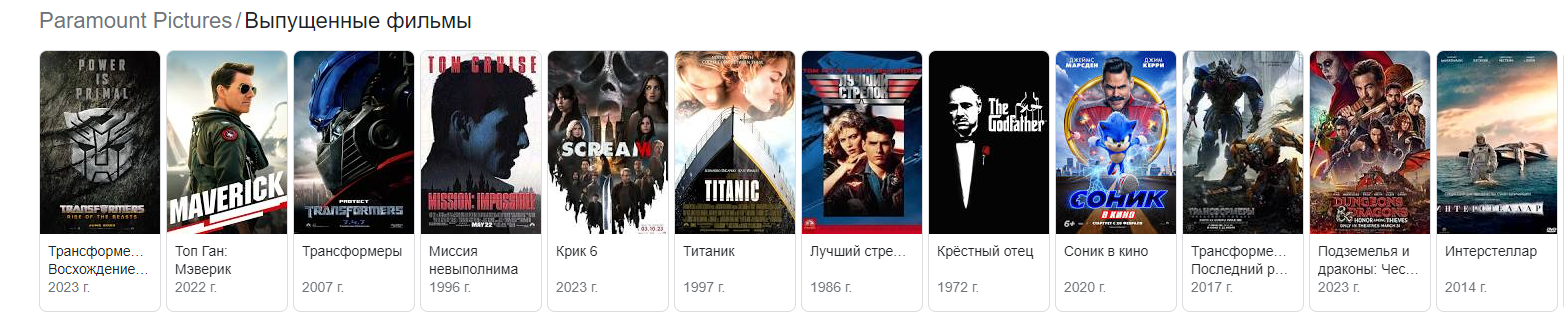




---
### MGM Home Entertainmen

Вспоминая детство, мы часто переносимся в те моменты, когда перед просмотром наших любимых фильмов рычащий лев становился символом настоящей магии. Логотип MGM Home Entertainment пробуждал чувство приятного и уютного ожидания, наполняя наши вечера ожиданием незабываемых приключений и эмоций. Ведь именно эта иконичная моментальная картинка с львом стала символом качества и неповторимой атмосферы киноискусства. MGM Home Entertainment была непревзойденной в искусстве подарить нам незабываемые моменты и вдохновение.


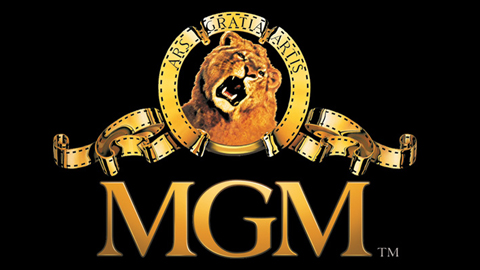





---
### Warner Bros. Pictures
Кто помнит старую добрую историю о кошке и мышке, о Томе и Джерри? Да, именно
благодаря Warner Bros. Pictures мы часами сидели у телевизоров, наблюдая за умной мышкой и “глупым” котом. Но ведь Warner Bros. не только этим знаменита. Именно она подарила нам великолепную историю о Гарри Поттере. И список этот можно продолжать бесконечно. Все эти фильмы и мультфильмы навсегда останутся в наших сердцах.

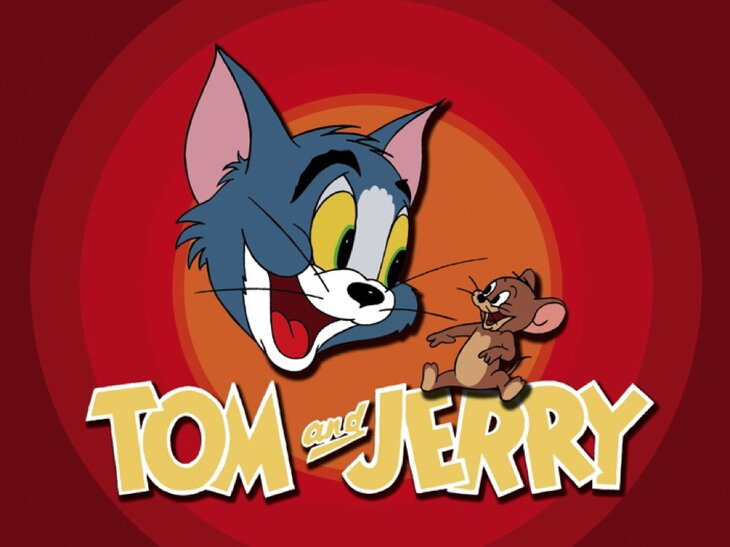

## Анализ рейтингов IMDB для случайной выборки фильмов

In [ ]:
movie_data['Film'].nunique()

434

Из-за большого количества уникальных фильмов мы не можем отобразить их на графике. Поэтому я создам случайную выборку размера 20.

In [ ]:
random_sample = movie_data.sample(n=20)

In [ ]:
random_sample.head(3)

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
441,The Aviator,2004,Michael Mann and Graham King,Nominee,2004,170,"[Biography, Drama]",7.5,344901,Billionaire and aviation tycoon Howard Hughes ...,...,Miramax,Certified-Fresh,86.0,224.0,Upright,79.0,207578.0,50.0,193.0,31.0
245,The Sound of Music,1965,Robert Wise,Winner,1965,172,"[Biography, Drama, Family]",8.0,215374,"A tuneful, heartwarming story, it is based on ...",...,20th Century-Fox,Certified-Fresh,83.0,71.0,Upright,91.0,606397.0,14.0,59.0,12.0
518,The Theory of Everything,2014,"Tim Bevan, Eric Fellner, Lisa Bruce, and Antho...",Nominee,2014,123,"[Biography, Drama, Romance]",7.7,421764,"In the 1960s, Cambridge University student and...",...,Focus Features,Certified-Fresh,80.0,270.0,Upright,84.0,75918.0,60.0,215.0,55.0


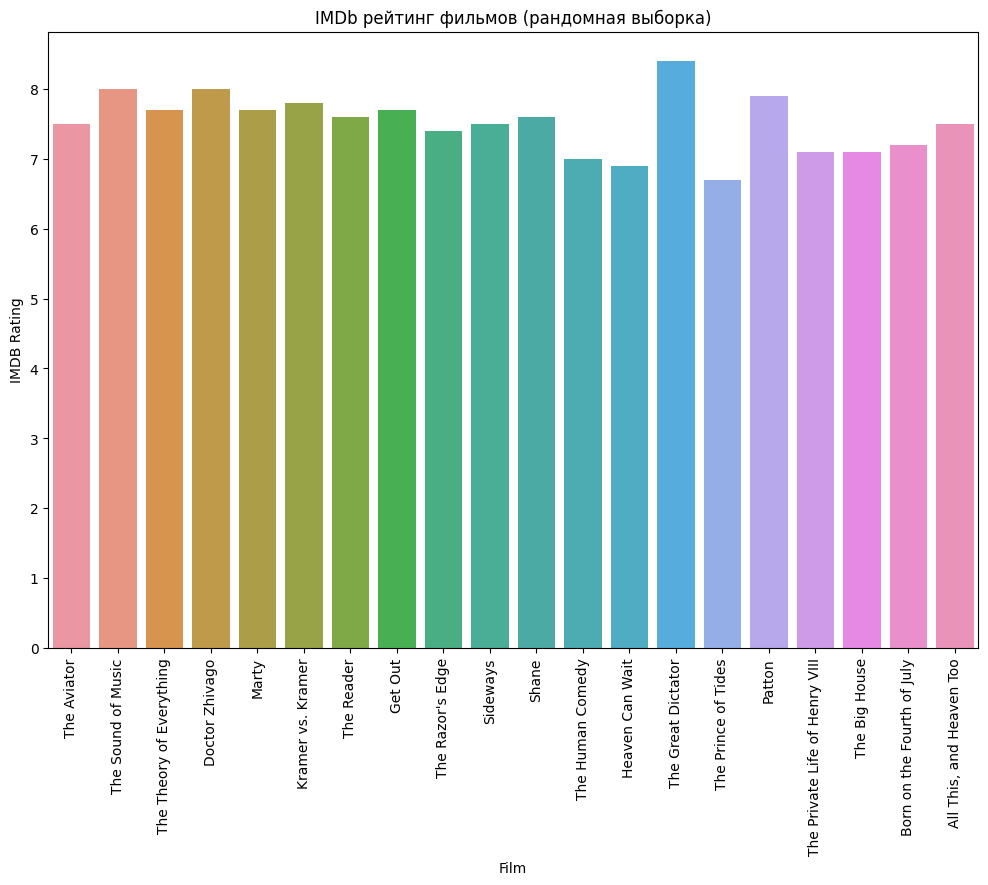

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=random_sample,
            x='Film',
            y='IMDB Rating')
plt.xticks(rotation=90)
plt.title('IMDb рейтинг фильмов (рандомная выборка)')
plt.show()

Запустив код трижды, я заметил, что рейтинги фильмов всегда были выше 6. Проверим, есть ли в основном наборе данных movie_data фильмы с рейтингом ниже 6.

In [ ]:
movie_data[movie_data['IMDB Rating'] < 6]

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
3,The Broadway Melody,1928,Metro-Goldwyn-Mayer,Winner,1929,100,"[Drama, Musical, Romance]",5.7,6890,"Vaudeville sisters ""Hank"" (Bessie Love) and Qu...",...,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0
6,In Old Arizona,1928,Fox,Nominee,1928,95,[Western],5.6,1019,"In this early Western, notorious bandit the Ci...",...,20th Century Fox Film Corporation,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0
13,Cimarron,1930,RKO Radio,Winner,1931,123,"[Drama, Western]",5.9,5851,"In 1889, adventurous lawyer and newspaper edit...",...,MGM Home Entertainment,Rotten,50.0,24.0,Spilled,25.0,1514.0,6.0,12.0,12.0
26,Cavalcade,1932,Fox,Winner,1933,112,"[Drama, Romance, War]",5.9,4961,Upper-crust Londoners Robert and Jane Marryot ...,...,20th Century Fox Film Corporation,Rotten,59.0,29.0,Spilled,26.0,1027.0,10.0,17.0,12.0


Анализируя вышеуказанные данные, становится очевидным, что фильмы, упомянутые, датируются периодом с 1928 по 1933 годы. В этот период оценки критиков и зрителей склоняются к уровню около 6. Что также привлекает внимание, это то, что большинство победителей в категории "Лучший фильм" представляют собой драматические произведения (имеются ввиду 3 из 4 фильмов). Эти факты подчеркивают важность жанра драмы и его влияние на кинематограф в указанный временной промежуток.

## Самые популярные слова в отзывах

Я решил проверить, какие слова являются самыми популярными в сritic_сonsensus (общее мнение или решение, к которому приходят критики после обсуждения или оценки чего-либо). Для этого избавимся от stop слов и разной пунктуации. После чего проделаем стемминг и сделаем вывод.

In [ ]:
сritic_сonsensus = movie_data[movie_data["Critic Consensus"] != 'Unknown']['Critic Consensus']

In [ ]:
snowball = SnowballStemmer(language='english')
eng_stop_words = stopwords.words('english')
my_stop_words = ["'s","ve", 'the','a', '--']

def tokenize_words(sentence: str, remove_stop_words: bool = True, remove_my_stop_words: bool = True):
    tokens = word_tokenize(sentence, language='english')
    tokens_without_punctuation = [i for i in tokens if i not in punctuation]

    if remove_stop_words:
        tokens_without_stop_words = [i for i in tokens_without_punctuation if i not in eng_stop_words]
        if remove_my_stop_words:
            tokens_without_stop_words = [i for i in tokens_without_stop_words if i not in my_stop_words]
        tokens = tokens_without_stop_words

    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [ ]:
popular_words = dict()

for i in сritic_сonsensus:
  words_list = tokenize_words(i, remove_stop_words=True, remove_my_stop_words=True)

  for word in words_list:
    popular_words[word] = popular_words.get(word,0)+1

In [ ]:
sorted_popular_words = sorted(popular_words.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_popular_words[:12]

[('perform', 123),
 ('the', 78),
 ('a', 42),
 ('film', 40),
 ('director', 40),
 ('stori', 40),
 ('drama', 38),
 ('power', 38),
 ('direct', 27),
 ('one', 27),
 ('cast', 26),
 ('classic', 24)]

После обработки данных, мы выявили список самых часто используемых слов у критиков. Абсолютным лидером является слово “perform”, что означает “выполнять” или “исполнять”. Второе место по популярности занимает слово “film” (фильм), что неудивительно. Почетное третье место разделяют слова “director” (режиссер) и “story” (история, рассказ). Вслед за ними с небольшим отставанием идут слова . Где-то позади догоняют слова “drama” (драма) и “power” (власть, мощь).

## Выбросы

Для более глубокого понимания распределения и характеристик количественных переменных построим диаграммы "ящик с усами" (boxplot). Эти визуализации предоставляют информацию о медиане, квартилях, выбросах и общем разбросе данных.

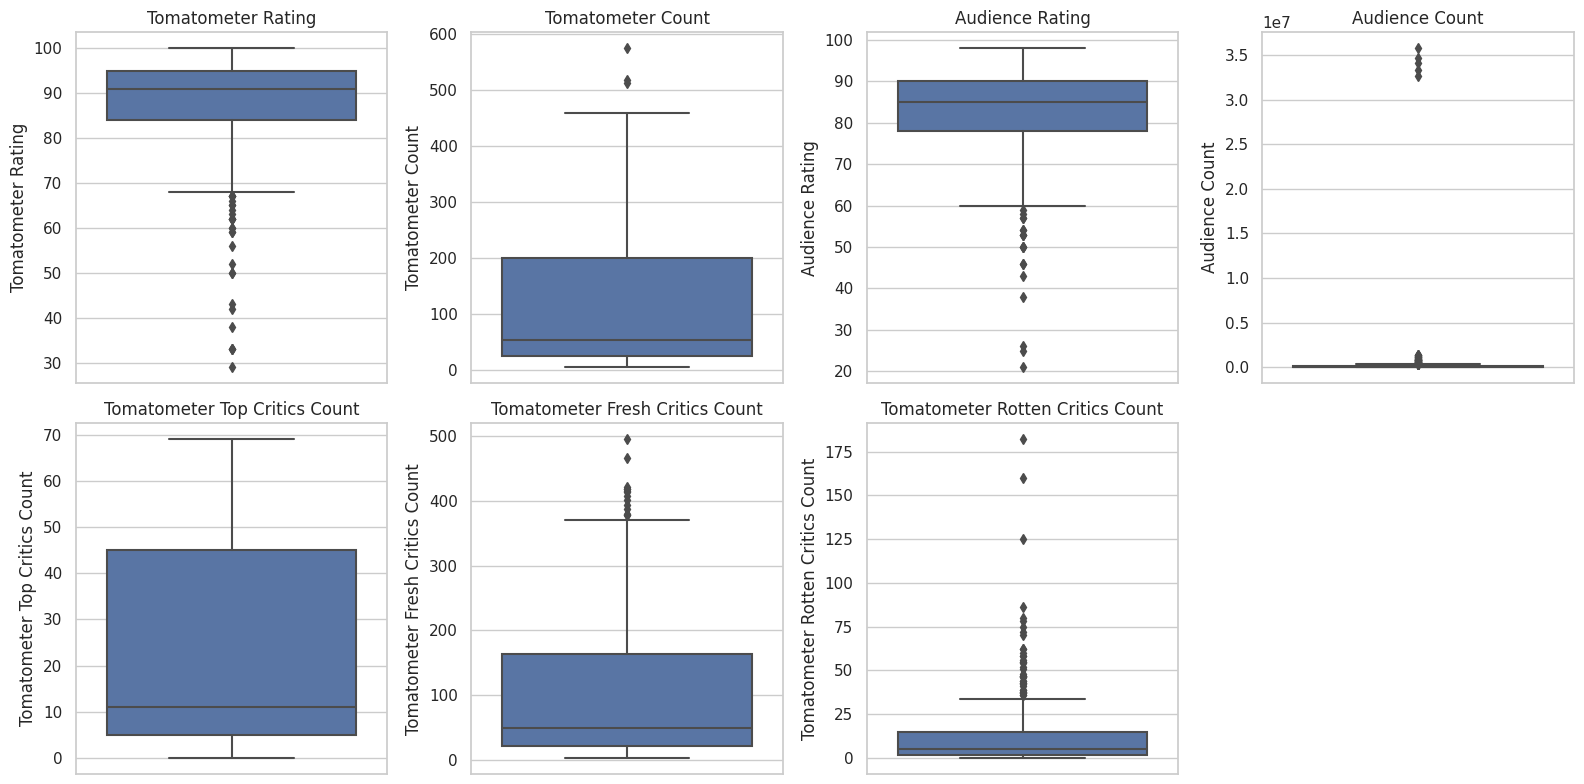

In [ ]:
columns_to_fill_with_iqr = [
    "Tomatometer Rating",
    "Tomatometer Count",
    "Audience Rating",
    "Audience Count",
    "Tomatometer Top Critics Count",
    "Tomatometer Fresh Critics Count",
    "Tomatometer Rotten Critics Count"
]

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

for i, column in enumerate(columns_to_fill_with_iqr):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(data=movie_data, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
for column in columns_to_fill_with_iqr:
    Q1 = movie_data[column].quantile(0.25)
    Q3 = movie_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    movie_data[column] = movie_data[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else movie_data[column].median())

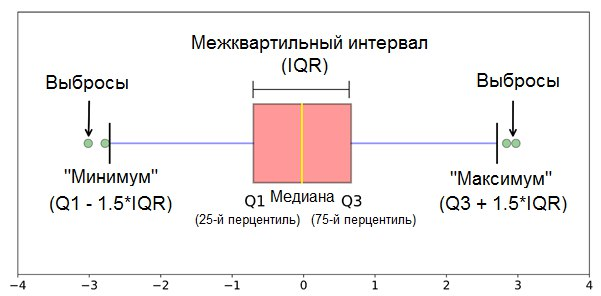

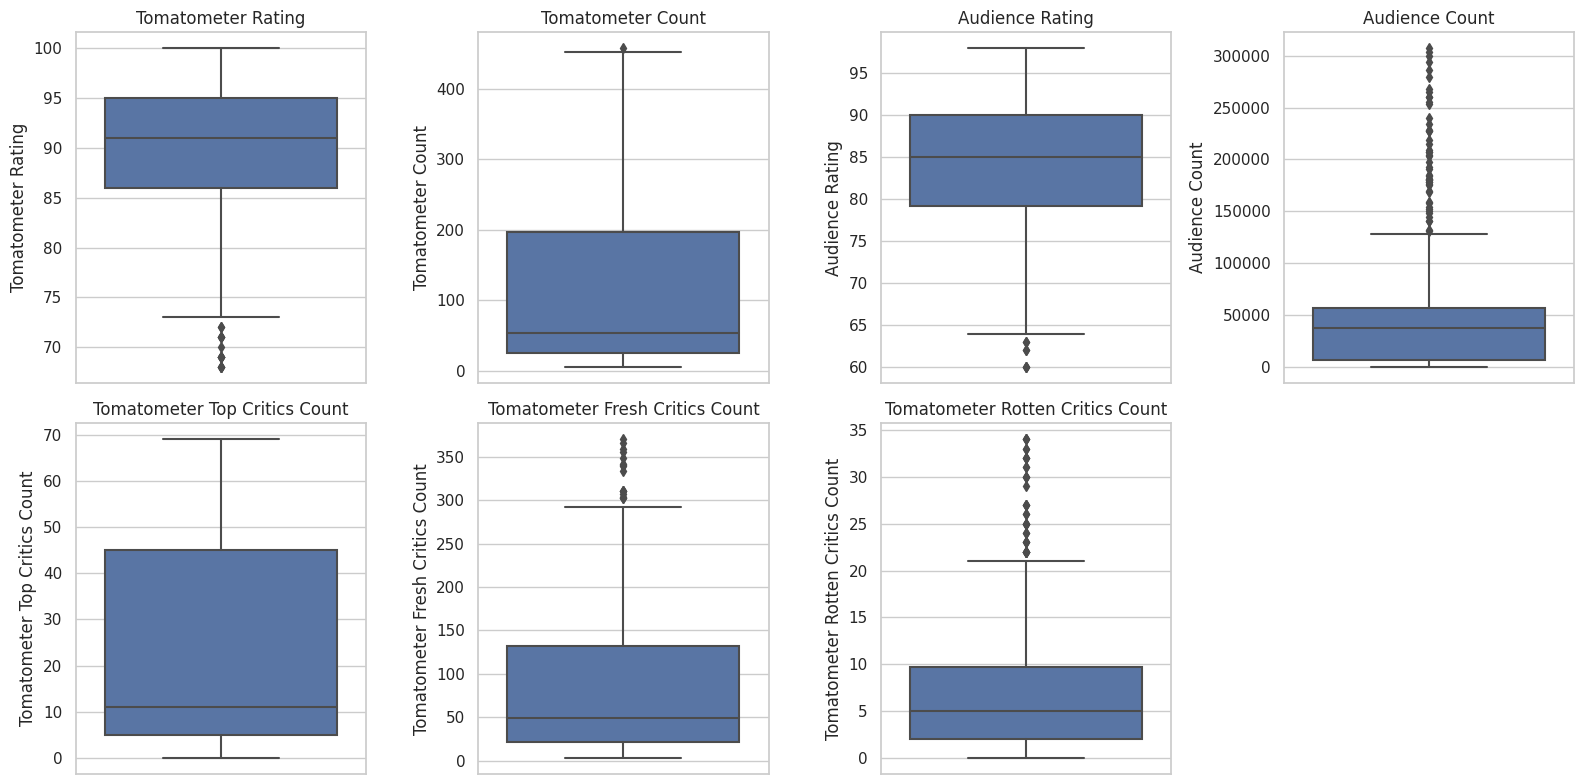

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

for i, column in enumerate(columns_to_fill_with_iqr):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(data=movie_data, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

В процессе анализа данных были выявлены выбросы в нескольких колонках. Для улучшения надежности анализа и снижения влияния выбросов я решил использовать метод интерквартильного размаха (IQR) для обработки выбросов.

Для каждой из указанных колонок были вычислены нижний и верхний пороги на основе IQR, и значения, находящиеся за пределами этих порогов, были заменены медианными значениями внутри IQR. Это позволило сгладить влияние выбросов на анализ, уменьшив их количество до минимального.



## Исследование распределения фичей

В этом блоке мы проведем анализ и визуализацию распределения различных фичей в наших данных.

### Audience Status

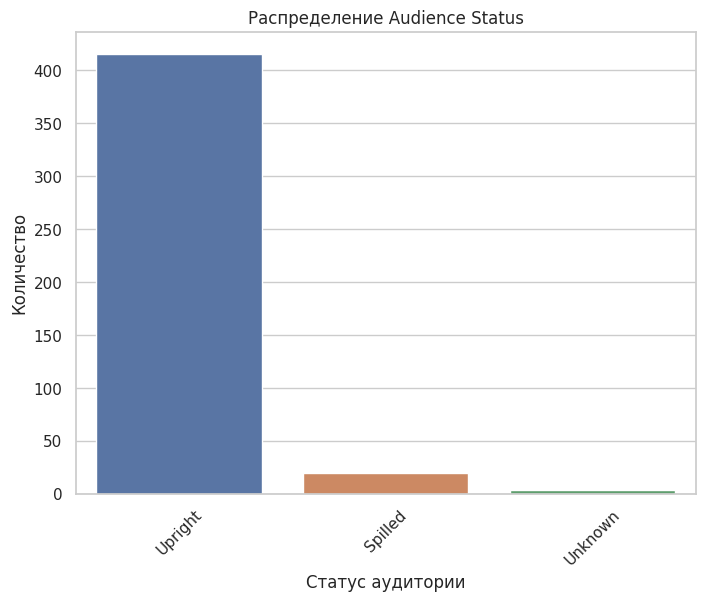

In [ ]:
status_counts = movie_data['Audience Status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts)
plt.title('Распределение Audience Status')
plt.xlabel('Статус аудитории')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Большинство записей в столбце "Audience Status" относятся к категории "Upright" (примерно 95%), что может указывать на доминирующий статус аудитории в данном наборе данных. Остальные два значения, "Spilled" и "Unknown", занимают остаточный процент.

* "Upright" : это значение обозначает, что фильм был номинирован или награжден и находится в нормальном или положительном состоянии, и это может быть связано с успехом фильма, высокими оценками критиков или выдающимися достижениями.

* "Spilled": Это значение указывает на обратное, то есть на какие-то негативные события или результаты в номинациях и наградах, возможно, на неудачи, проигрыши или конфликты в связи с номинациями и наградами.

### Movie Genre

In [ ]:
genre_counts = movie_data['Movie Genre'].explode().value_counts()

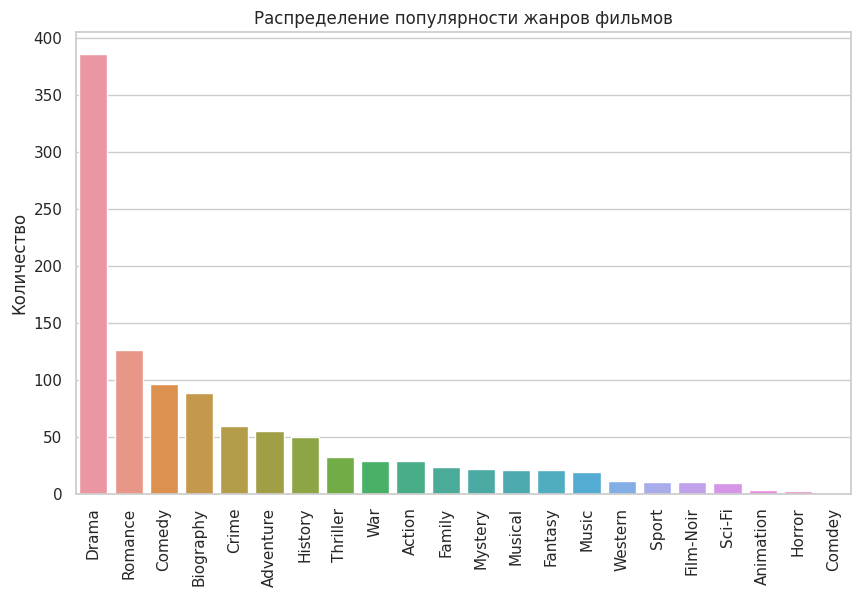

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts);
plt.title("Распределение популярности жанров фильмов")
plt.ylabel("Количество")
plt.xticks(rotation=90)
plt.show()

Жанр "Драма" оказался самым популярным. Драматические фильмы часто являются популярными из-за их способности затрагивать эмоции и рассказывать глубокие истории.

Давайте теперь проанализируем распределение данных, учитывая важную фичу 'Award', которая поможет нам лучше понять влияние наград на наши данные

In [ ]:
genre_counts_and_award = movie_data['Movie Genre'].explode()

In [ ]:
merged_df = genre_counts_and_award.reset_index().merge(movie_data['Award'].reset_index(), how='left', on='index').drop('index', axis=1)

In [ ]:
merged_df.head()

,Movie Genre,Award
0,Drama,Winner
1,Romance,Winner
2,War,Winner
3,Drama,Winner
4,Musical,Winner


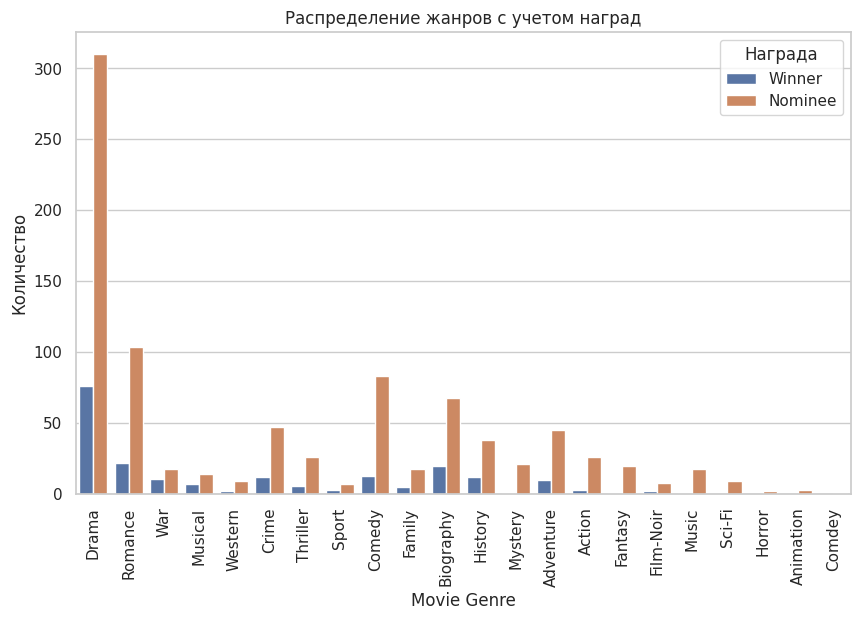

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Movie Genre', hue='Award')
plt.title('Распределение жанров с учетом наград')
plt.xticks(rotation=90)
plt.ylabel("Количество")
plt.legend(title='Награда', loc='upper right')
plt.show()

Неудивительно, что жанр 'Драма' оказался наиболее популярным, как в номинациях, так и в числе победителей, поскольку он номинировался и выигрывал намного чаще, чем остальные жанры

# Вывод

В ходе исследования данных (EDA) были проведены различные анализы для получения глубокого понимания набора данных. Начиная с тепловой карты корреляции, мы выявили переменные с высокой корреляцией, что может быть важным для последующего анализа.

Далее, мы рассмотрели значения IMDb Rating в разные годы, связанные с номинациями и наградами Оскар, чтобы понять, как меняется рейтинг со временем.

Затем, перейдя к языку R, мы проверили наши фичи на нормальность распределения с использованием теста Шапиро-Уилка и провели дисперсионный анализ, вероятно, для исследования взаимодействия между различными группами.

После возвращения к Python, был выполнен анализ наград компаний и рейтингов IMDb для случайной выборки фильмов. Мы также исследовали отзывы и выявили самые популярные слова. Были обнаружены и удалены выбросы, что может существенно влиять на результаты анализа.

В целом, данное исследование позволило нам лучше понять наш набор данных, выявить важные закономерности и подготовить его для дальнейшего анализа и построения моделей.